In [26]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt  #Пакет для построяния графиков и прочего

<p style="align: center;"><img align=center src="https://netology.ru/blog/wp-content/uploads/2020/03/logo-full-color-black-1.png"  width=400></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


In [7]:
import pandas as pd  # Подгрузим пакет 

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные

# изменить форму кадра данных d, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])


# заменить имена столбцов
df_melt.columns = ['index', 'treatments', 'value']

# создать коробчатую диаграмму, чтобы увидеть распределение данных по обработкам. Используя коробчатую диаграмму, мы можем
# легко обнаружить различия между разными методами лечения
 
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [3]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


### Начнем с датасета про морских гребешков

In [4]:
data = pd.read_csv('abalone.csv')
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [5]:
half = len(data['Length']) / 2 
sam2 = data.loc[:half, 'Length'] # Берем вторую половину 
sam1 = data.loc[half:, 'Length'] # Берем первую половину 

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5565212835974083, pvalue=0.11965998094160571)

# Дисперсионный анализ и датасет про раковины

In [6]:
#Дисперсионный анализ.

from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Вот некоторые данные [3] об измерении раковины (длина рубца передней приводящей мышцы, 
# стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
# Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия; 
# и Tvarminne, Финляндия, взяты из гораздо большего набора данных, использованных McDonald et al. (1991).


# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

7.121019471642447 0.0002812242314534544
Different distribution (reject H0)


# Можете привести пример когда выборки зависимы, а когда нет ?

In [7]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерирумм две независимых выборки
 
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент
group_1 = group
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
 


# Сравнение групп

stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=50.000, p=0.106
Одинаковые распределения (не отвергаем H0)


In [8]:
np.mean(group_1), np.mean(group_2)

(21.0, 22.75)

In [9]:
# pd.DataFrame(group_1).hist()
# pd.DataFrame(group_2).hist()

# Какие выборки зависимы? Приведите примеров

In [10]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
seed(1)



group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент

group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=0.000, p=0.317
Одинаковые распределения (не отвергаем H0)


D:\Users\sasha\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
D:\Users\sasha\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [11]:
  
# pd.DataFrame(group_1).hist()
# pd.DataFrame(group_2).hist()    

# Задания для самостоятельного решения

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [8]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)



import scipy.stats as stats

stats.ttest_ind(A, B)

# Различия не значимы
# pvalue > 5%, значит принимаем Н0 - статистически значимых различий в эффекте нет.

 

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [9]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)


# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

#Выполняем the Wilcoxon-Signed Rank Test
 

stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')





Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 


water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [10]:
from scipy.stats import f_oneway


water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

fvalue, pvalue = stats.f_oneway(water,nutri,mineral )
print(fvalue, pvalue)
# Различия незначимы. принимаем Н0 - значимых различий в эффекте нет



stats.ttest_ind(nutri, mineral)
# Различия значимы. отвергаем Н0 - эффект есть


12.525963044834192 2.9240047906326866e-05


Ttest_indResult(statistic=4.257784009579262, pvalue=0.00012136733401245426)

# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>
 

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=400></p>


# Данные A/B тестирования

In [4]:
import pandas as pd
data = pd.read_csv('cookie_cats.csv') 
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
data1 = data.replace(False, 0)
data1

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0.0,0.0
1,337,gate_30,38,1.0,0.0
2,377,gate_40,165,1.0,0.0
3,483,gate_40,1,0.0,0.0
4,488,gate_40,179,1.0,1.0
...,...,...,...,...,...
90184,9999441,gate_40,97,1.0,0.0
90185,9999479,gate_40,30,0.0,0.0
90186,9999710,gate_30,28,1.0,0.0
90187,9999768,gate_40,51,1.0,0.0


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

# Задание: провести анализ данных и сделать выводы о месте установки ворот. 
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. 

In [6]:
df1 = data1.loc[(data1['version'] == 'gate_30')] 
df1 = df1.drop(['version','userid'], axis = 1)
df1.apply(pd.to_numeric)

,sum_gamerounds,retention_1,retention_7
0,3,0.0,0.0
1,38,1.0,0.0
6,0,0.0,0.0
11,0,0.0,0.0
13,39,1.0,0.0
...,...,...,...
90179,14,1.0,0.0
90180,7,0.0,0.0
90182,21,1.0,0.0
90183,10,0.0,0.0


In [7]:
df2 = data1.loc[(data1['version'] == 'gate_40')] 
df2 = df2.drop(['version','userid'], axis = 1)
df2.apply(pd.to_numeric)

,sum_gamerounds,retention_1,retention_7
2,165,1.0,0.0
3,1,0.0,0.0
4,179,1.0,1.0
5,187,1.0,1.0
7,2,0.0,0.0
...,...,...,...
90181,10,1.0,0.0
90184,97,1.0,0.0
90185,30,0.0,0.0
90187,51,1.0,0.0


In [15]:
stats.ttest_ind(df1, df2)

Ttest_indResult(statistic=array([0.89104262, 1.78409793, 3.1644995 ]), pvalue=array([0.37290868, 0.07441112, 0.00155402]))

In [ ]:
#Статистически значимые различия есть в столбце "retention_7"

#Ваши выводы

In [11]:
#Сгрупируем результаты теста по версиям игры.
a = data.groupby('version').count().reset_index()

In [12]:
a1 = a.loc[(a['version'] == 'gate_30')].drop(['version','userid', 'sum_gamerounds', 'retention_1'], axis = 1)
a1

,retention_7
0,44700


In [13]:
a2 = a.loc[(a['version'] == 'gate_40')].drop(['version','userid', 'sum_gamerounds', 'retention_1'], axis = 1)
a2

,retention_7
1,45489


In [14]:
from scipy.stats import f_oneway
F, p = f_oneway(a1, a2)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

[nan] [nan]
Different distribution (reject H0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3234: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / dfwn
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [15]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(a1, a2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

ValueError: Samples x and y must be one-dimensional.

In [ ]:
#Я не понимаю, что мы должны проверить по численности. я пыталась сделать 2 теста на определение значимых различий в численности

Text(0.5, 0, '№ Игрового раунда')

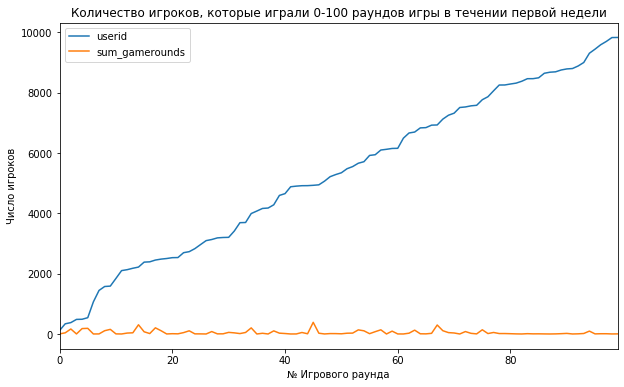

In [16]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

ax = data[:100].plot(figsize=(10,6))
ax.set_title("Количество игроков, которые играли 0-100 раундов игры в течении первой недели")
ax.set_ylabel("Число игроков")
ax.set_xlabel('№ Игрового раунда')

In [41]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    print(data.sample(frac = 1, replace = True))
#print(boot_1d)    
# Преобразование списка в DataFrame
#boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
#boot_1d.plot(kind='density')

        userid  version  sum_gamerounds  retention_1  retention_7
59138  6547854  gate_30               4        False        False
77394  8569482  gate_30               8        False        False
84043  9315252  gate_40              11        False        False
59952  6639340  gate_40              27         True        False
76599  8482514  gate_40              49        False        False
...        ...      ...             ...          ...          ...
55770  6182087  gate_40               9        False        False
59618  6602655  gate_30               1        False        False
70969  7868051  gate_40              11        False        False
12118  1338798  gate_30              20        False        False
72328  8012422  gate_30              16        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
82221  9110249  gate_30             131         True        False
71457  7919628  gate_30              33        Fal

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
4751    528849  gate_30             115         True         True
52039  5770319  gate_30              37        False        False
3181    353322  gate_30               2        False        False
84563  9374429  gate_40             233         True         True
65958  7303945  gate_40              18         True        False
...        ...      ...             ...          ...          ...
66489  7360984  gate_30              16         True        False
22944  2556258  gate_40               3        False        False
44163  4891400  gate_30              10        False        False
62634  6938848  gate_40              50         True         True
18439  2051321  gate_30               0        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
13195  1463649  gate_30              33         True        False
77425  8572508  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
31130  3464927  gate_30               4        False        False
70459  7811588  gate_40              32         True        False
11651  1288296  gate_40              35        False        False
3861    428184  gate_30               3        False        False
61860  6853271  gate_40              14         True        False
...        ...      ...             ...          ...          ...
60617  6714330  gate_40              28        False        False
35396  3920658  gate_30               0        False        False
51848  5749706  gate_30             108         True         True
16497  1837318  gate_30               5         True        False
21552  2400019  gate_30              27         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
32107  3569956  gate_40              24        False        False
11459  1265339  gate_40  

        userid  version  sum_gamerounds  retention_1  retention_7
1138    125749  gate_40              11        False        False
53485  5938899  gate_40              24        False        False
5438    603694  gate_40              66         True        False
59579  6598488  gate_30             202         True         True
16728  1861660  gate_40               5        False        False
...        ...      ...             ...          ...          ...
76951  8522779  gate_40              13         True        False
47333  5250934  gate_30               8         True        False
763      83254  gate_30               3         True        False
13183  1462400  gate_30               0        False        False
30638  3408386  gate_30              10        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
50062  5549404  gate_30              37        False        False
39845  4412901  gate_30               1        Fal

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
62214  6892267  gate_40              20         True        False
35402  3921097  gate_30             663         True         True
52391  5813242  gate_30               1        False        False
32778  3641760  gate_40              18        False        False
76468  8467581  gate_40               1        False        False
...        ...      ...             ...          ...          ...
79920  8848787  gate_40              70         True        False
5985    661839  gate_40              24        False        False
9735   1071513  gate_40              12        False        False
35238  3902530  gate_40               6        False        False
18725  2085099  gate_40               4        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
67605  7492753  gate_40              14         True        False
41776  4620366  gate_40  

        userid  version  sum_gamerounds  retention_1  retention_7
82890  9183109  gate_30               5        False        False
42935  4748174  gate_40               0        False        False
9822   1082361  gate_40              10        False        False
34661  3838453  gate_40              29         True        False
75282  8336497  gate_30               4        False        False
...        ...      ...             ...          ...          ...
12442  1378296  gate_40               1        False        False
12537  1388964  gate_40              25        False        False
75616  8374757  gate_40              33         True        False
41337  4573494  gate_40             717         True         True
15013  1664788  gate_30              95         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
49052  5439849  gate_40              14        False        False
73568  8150611  gate_30               2        Fal

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
34746  3847738  gate_30              12        False        False
40948  4529078  gate_30             253        False         True
67700  7502176  gate_40               5        False        False
21716  2417878  gate_40               0        False        False
59159  6549573  gate_30              13        False        False
...        ...      ...             ...          ...          ...
49966  5540023  gate_30              20         True        False
79242  8773187  gate_40              18        False        False
37259  4124361  gate_40              29         True         True
42369  4687176  gate_40              51         True        False
41762  4619096  gate_40               2         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
78943  8743179  gate_40               3        False        False
50081  5552175  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
38887  4306792  gate_40              10        False        False
3362    372206  gate_30               0        False        False
9059    996940  gate_40             353         True         True
17852  1986620  gate_30               5        False        False
18641  2075164  gate_30               4        False        False
...        ...      ...             ...          ...          ...
4319    478994  gate_30              47         True        False
48033  5329637  gate_40              14         True        False
75727  8386312  gate_30               2        False        False
77513  8581886  gate_30              81        False         True
71642  7938861  gate_40              22         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
86036  9529168  gate_30              40         True         True
3826    424389  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
3408    376530  gate_40             103         True        False
20825  2316734  gate_30              54         True        False
28888  3219775  gate_30              56         True        False
80180  8875013  gate_40              33         True        False
11632  1285852  gate_30               8         True        False
...        ...      ...             ...          ...          ...
76630  8485567  gate_30              66         True        False
20779  2311745  gate_30              30         True         True
8209    903824  gate_30              15        False        False
51875  5752048  gate_40              44         True        False
30332  3375138  gate_40              12         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
27800  3096129  gate_40              41         True        False
64745  7172191  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
51199  5674619  gate_40               4        False        False
45274  5015149  gate_40             109         True         True
51687  5732406  gate_40              60         True        False
79974  8853875  gate_30               1        False        False
52316  5804569  gate_30              13         True        False
...        ...      ...             ...          ...          ...
56079  6215357  gate_40             139         True        False
11313  1250389  gate_30              34         True        False
46498  5153303  gate_40              37         True        False
35759  3959079  gate_30              10         True        False
30569  3401074  gate_30             118         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
29195  3251501  gate_30               2        False        False
10005  1101931  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
25386  2825057  gate_40              40        False         True
72679  8051256  gate_30             181        False         True
82506  9142029  gate_40              72         True        False
42552  4707421  gate_40              45         True        False
79704  8824629  gate_30              32        False        False
...        ...      ...             ...          ...          ...
25885  2881775  gate_40             165         True        False
51547  5716201  gate_40             359         True         True
31232  3475763  gate_30              67        False        False
13501  1494955  gate_40               6        False        False
17568  1957099  gate_40               4        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
23843  2655538  gate_40               4        False        False
49964  5539950  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
15145  1679257  gate_30               2        False        False
65931  7300287  gate_30               7        False        False
34227  3792617  gate_30               4        False        False
78198  8657927  gate_30              14        False        False
17114  1906968  gate_30              26         True        False
...        ...      ...             ...          ...          ...
33330  3701203  gate_40              12        False        False
14693  1632305  gate_30              41         True        False
31170  3469673  gate_40              30        False        False
32192  3580673  gate_30               7        False        False
56049  6211971  gate_40              11        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
78342  8675185  gate_30              47         True        False
15875  1762055  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
80993  8970004  gate_30              37        False        False
84091  9320797  gate_30              61        False         True
293      29311  gate_40               7        False        False
78637  8708448  gate_30              16         True        False
21959  2445223  gate_40               0        False        False
...        ...      ...             ...          ...          ...
25530  2842284  gate_30               8        False        False
73655  8160098  gate_30               0        False        False
10181  1121587  gate_30             771         True         True
86940  9632131  gate_40              61         True        False
25591  2849017  gate_40              34        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
23241  2588393  gate_30              21         True         True
11813  1305354  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
13642  1511966  gate_30              69         True        False
67986  7534852  gate_40              17        False        False
57904  6409893  gate_40               2        False        False
40055  4433851  gate_40              66         True        False
18707  2083255  gate_40               3        False        False
...        ...      ...             ...          ...          ...
27192  3029350  gate_40              10        False        False
5397    599444  gate_40               3        False        False
6217    687932  gate_30               0        False        False
51115  5665775  gate_40              98         True        False
75305  8339588  gate_40               2        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
48597  5387871  gate_40              17        False        False
85183  9438797  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
34089  3779663  gate_40              74         True        False
9337   1026980  gate_30              42         True        False
56858  6301929  gate_40              42         True         True
79337  8783797  gate_30               6        False        False
65786  7285628  gate_40              17        False        False
...        ...      ...             ...          ...          ...
40382  4467535  gate_30               0        False        False
83121  9209461  gate_30             227         True         True
74610  8267623  gate_30             153         True         True
19472  2166578  gate_40              56         True         True
89596  9935981  gate_40               8        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
31620  3518104  gate_30               6        False        False
65883  7296638  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
77709  8603143  gate_40               0        False        False
74902  8298428  gate_30               1        False        False
17344  1930847  gate_30               2         True        False
72295  8008120  gate_30              61        False        False
17344  1930847  gate_30               2         True        False
...        ...      ...             ...          ...          ...
59479  6585951  gate_30              70         True        False
43318  4791814  gate_30             348         True         True
7941    874350  gate_40              10        False        False
22294  2483690  gate_40              36         True         True
6367    705646  gate_40              26         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
79605  8812939  gate_40               9        False        False
19595  2181940  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
78507  8694097  gate_40              14         True        False
78335  8674481  gate_30             214        False        False
23279  2592309  gate_40             149         True         True
23212  2584820  gate_40              14        False        False
46760  5185838  gate_30              13         True        False
...        ...      ...             ...          ...          ...
44419  4918269  gate_30               8        False        False
17951  1997850  gate_30               3        False        False
12640  1400292  gate_30             156         True         True
72873  8072229  gate_30               0        False        False
3636    402272  gate_40               6        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
66819  7400659  gate_30             107        False         True
9101   1001746  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
71573  7931652  gate_40              29         True        False
75978  8414972  gate_30               2        False        False
56898  6305696  gate_30               2        False        False
73510  8144929  gate_30               6        False        False
75817  8395335  gate_40               1         True        False
...        ...      ...             ...          ...          ...
21534  2397039  gate_40              85         True        False
7050    781199  gate_40              11         True        False
66914  7411020  gate_30              16        False        False
57212  6338193  gate_30              37         True        False
55761  6181505  gate_30               8        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
14531  1612463  gate_40              91         True         True
38384  4248362  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
7880    867595  gate_30               1        False        False
44051  4875023  gate_40               1        False        False
71962  7971688  gate_30              43        False        False
26472  2947372  gate_30               2        False        False
43249  4783256  gate_40              27         True        False
...        ...      ...             ...          ...          ...
64896  7188639  gate_30               4        False        False
81280  8998280  gate_30             161         True         True
78341  8675183  gate_40               8        False        False
33382  3707372  gate_40             103        False        False
32700  3634540  gate_30              76         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
48051  5330808  gate_40               1        False        False
28583  3184937  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
71767  7952704  gate_30               0        False        False
62161  6886217  gate_30              24         True        False
16600  1847895  gate_30              42         True        False
7989    881014  gate_40              23         True        False
88209  9777580  gate_30              47        False        False
...        ...      ...             ...          ...          ...
45684  5059285  gate_40             117         True         True
24365  2709563  gate_30               1        False        False
87131  9653756  gate_40             129        False         True
14383  1595302  gate_40              80         True         True
19195  2136741  gate_30              12         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
34521  3824294  gate_40              67         True         True
28611  3188032  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
36264  4016222  gate_30               0        False        False
59983  6643013  gate_30               2        False        False
83895  9297168  gate_30              91         True         True
3181    353322  gate_30               2        False        False
55129  6116324  gate_30              43         True        False
...        ...      ...             ...          ...          ...
14337  1589126  gate_30               2        False        False
32705  3635268  gate_30               1        False        False
27997  3119096  gate_30               0        False        False
25912  2885068  gate_40               9         True        False
81656  9046093  gate_30              21         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
23326  2596994  gate_30               7        False        False
30477  3390076  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
79072  8755822  gate_30               7        False        False
60976  6760443  gate_30               1        False        False
79369  8787744  gate_40              39        False        False
48078  5333551  gate_30              39         True        False
32096  3568970  gate_30              15        False        False
...        ...      ...             ...          ...          ...
54595  6059921  gate_40              44         True        False
16021  1779089  gate_30               4        False        False
79888  8844832  gate_30              21        False        False
69900  7748674  gate_40               1        False        False
7768    855705  gate_30              21        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
77885  8622628  gate_30              12        False        False
76456  8466005  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
1515    163607  gate_40              12        False        False
1594    172353  gate_30              15         True        False
33576  3726028  gate_40             147         True         True
90001  9978444  gate_40              82         True        False
1132    125035  gate_40               4        False        False
...        ...      ...             ...          ...          ...
25753  2868549  gate_40              14        False        False
58830  6512305  gate_30               2        False        False
5384    598193  gate_30              10        False        False
67316  7457947  gate_30              15         True        False
26993  3008429  gate_30               3        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
10464  1155561  gate_40              41         True        False
37811  4184190  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
86961  9634195  gate_40              71        False        False
75067  8314921  gate_30             132         True         True
83832  9291492  gate_30               4        False        False
73272  8117904  gate_40              92         True         True
31127  3464635  gate_30              79         True        False
...        ...      ...             ...          ...          ...
12315  1363803  gate_40               4        False        False
77243  8553049  gate_40             929         True         True
11152  1232490  gate_40               0        False        False
69614  7715185  gate_30              39        False        False
37112  4108616  gate_30              18         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
84691  9389816  gate_30              11        False        False
45126  5000118  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
57330  6351438  gate_40               0        False        False
71939  7969684  gate_30              41        False        False
38164  4224933  gate_30              44         True        False
79880  8844393  gate_40             230         True         True
70311  7795915  gate_30               1        False        False
...        ...      ...             ...          ...          ...
16817  1872646  gate_30              46         True         True
60901  6751083  gate_40               0        False        False
47942  5317416  gate_30             135         True         True
84440  9361811  gate_30               1        False        False
63249  7005265  gate_30             168         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
9428   1037663  gate_40              19         True        False
38504  4263219  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
72547  8038250  gate_40               6        False        False
80822  8951005  gate_30              44         True        False
56735  6287697  gate_40              99         True         True
51574  5719276  gate_40              38         True        False
13898  1540332  gate_40               1        False        False
...        ...      ...             ...          ...          ...
52549  5833243  gate_40               0        False        False
22763  2535133  gate_30               1        False        False
62342  6907200  gate_30               2        False        False
68093  7546416  gate_30               1        False        False
38329  4242963  gate_40               5        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
11509  1271121  gate_30             183         True         True
88032  9755328  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
120      11675  gate_40              17        False        False
69006  7648811  gate_40              14        False        False
7972    878991  gate_40              10         True        False
31279  3480681  gate_30               9        False        False
33794  3751007  gate_30               2        False        False
...        ...      ...             ...          ...          ...
71475  7921297  gate_30              36        False        False
78340  8674906  gate_40               9        False        False
8578    944848  gate_40              15        False        False
59730  6614514  gate_40               2        False        False
59104  6544452  gate_30               1        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
41418  4582606  gate_40               7         True        False
17651  1965764  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
80428  8903449  gate_30               3        False        False
23351  2599518  gate_40              11        False        False
21193  2359246  gate_40              53         True        False
41772  4620158  gate_30              75         True         True
69749  7730940  gate_40              11         True        False
...        ...      ...             ...          ...          ...
55031  6104815  gate_30               1        False        False
34836  3858202  gate_30               7        False        False
31643  3521244  gate_40              11        False        False
26263  2926623  gate_40               5        False        False
17483  1946913  gate_30             126         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
71882  7963714  gate_40             115         True        False
48787  5407260  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
66306  7341157  gate_40             180         True        False
21336  2375076  gate_30               3        False        False
32363  3599267  gate_40              32        False        False
10074  1109672  gate_30               1        False        False
70875  7859412  gate_40               8        False        False
...        ...      ...             ...          ...          ...
88765  9842457  gate_40               5        False        False
20290  2254248  gate_40              19        False        False
86934  9631271  gate_30              13        False        False
83642  9269687  gate_30              20         True        False
55320  6134477  gate_30               3        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
45604  5051393  gate_40              35        False         True
82542  9145729  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
66763  7394305  gate_40              45         True        False
35503  3932943  gate_30               0        False        False
23451  2611689  gate_30              72        False        False
86828  9621457  gate_40              11         True        False
20498  2279351  gate_30              69         True        False
...        ...      ...             ...          ...          ...
60080  6652593  gate_40             206         True         True
73611  8155257  gate_40               2        False        False
60072  6651705  gate_30              86         True        False
63826  7069181  gate_40             144         True         True
83899  9297528  gate_30              16         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
14258  1581388  gate_40               3        False        False
57303  6348045  gate_30  

        userid  version  sum_gamerounds  retention_1  retention_7
59689  6610915  gate_30               2        False        False
53087  5894205  gate_40               0        False        False
7529    834495  gate_30              40         True        False
52721  5853641  gate_30              40         True        False
9376   1030303  gate_30              28        False        False
...        ...      ...             ...          ...          ...
18075  2012533  gate_30               3        False        False
30018  3341205  gate_40             314         True         True
69412  7693732  gate_30              10        False        False
39899  4417927  gate_30              21         True        False
39336  4358048  gate_40               7        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
84091  9320797  gate_30              61        False         True
26394  2940103  gate_30              26         Tr

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
19962  2221413  gate_40               2         True        False
63208  7000730  gate_30              11         True        False
81912  9076454  gate_30             218         True        False
17941  1996176  gate_30               8        False        False
15678  1741489  gate_40               3         True        False
...        ...      ...             ...          ...          ...
13471  1492052  gate_40              78         True        False
60271  6672340  gate_30             232         True         True
48521  5380480  gate_30              72         True         True
14090  1560984  gate_40               0        False        False
23116  2575320  gate_40              12         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
61380  6802574  gate_30              37         True        False
52057  5772738  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
39328  4357461  gate_30              52        False         True
88410  9801335  gate_30               0        False        False
48165  5343167  gate_30              14        False        False
72559  8039006  gate_30              16        False        False
59089  6542728  gate_40              59         True        False
...        ...      ...             ...          ...          ...
71049  7876069  gate_40               0        False        False
1396    151367  gate_30             222         True         True
3331    368973  gate_40               1        False        False
47519  5272697  gate_40              56         True         True
57884  6408246  gate_40               2        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
82807  9174192  gate_40               6        False        False
24740  2754279  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
86257  9555605  gate_30               4        False        False
64979  7197463  gate_30              26        False         True
16575  1845659  gate_30             111         True        False
27512  3063535  gate_30               1        False        False
56255  6234028  gate_30             162         True         True
...        ...      ...             ...          ...          ...
77209  8549147  gate_30               4        False        False
71840  7960519  gate_40              67         True         True
3244    359728  gate_30             122         True         True
51947  5760083  gate_40              17        False        False
78683  8713207  gate_30             191         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
70659  7834002  gate_30              11        False        False
55542  6159806  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
9568   1053275  gate_40               9        False        False
59603  6601493  gate_40              22        False        False
46419  5141932  gate_40              51        False         True
39029  4322354  gate_30              22        False        False
45743  5066640  gate_30              76         True         True
...        ...      ...             ...          ...          ...
28139  3134812  gate_40              60         True        False
89806  9960124  gate_30              23         True        False
21475  2391249  gate_30               2        False        False
88509  9811516  gate_40             174         True         True
76404  8460803  gate_40              37         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
87444  9687482  gate_30               8         True        False
52864  5870085  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
10646  1175166  gate_40               6         True        False
84571  9375879  gate_30               1        False        False
51681  5731576  gate_30             102         True        False
63313  7011906  gate_30               1        False        False
61500  6815248  gate_40              29         True        False
...        ...      ...             ...          ...          ...
43200  4777082  gate_30              16         True        False
72543  8037901  gate_30               0        False        False
16734  1862610  gate_40               0        False        False
55543  6159824  gate_40               4        False        False
64809  7178710  gate_30               0        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
36261  4015687  gate_40              18        False        False
51424  5702179  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
47887  5311840  gate_30               2        False        False
60080  6652593  gate_40             206         True         True
85507  9474107  gate_30             214         True         True
58754  6504275  gate_30              24        False        False
181      17422  gate_40               2        False        False
...        ...      ...             ...          ...          ...
3002    330650  gate_30               0        False        False
33942  3765469  gate_30               6         True        False
25438  2831647  gate_30               8        False        False
54822  6084710  gate_30              75         True        False
67045  7427171  gate_30               2         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
52029  5768851  gate_40             121         True        False
30923  3441771  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
86372  9566636  gate_40               3        False        False
70815  7852505  gate_30              27         True         True
59046  6537106  gate_40               2        False        False
36631  4057705  gate_30              27         True        False
77069  8533415  gate_30               1        False        False
...        ...      ...             ...          ...          ...
83341  9235799  gate_40             105        False         True
9902   1091717  gate_40              21        False        False
46267  5125470  gate_30               5        False        False
56174  6225139  gate_30               0        False        False
50320  5578371  gate_40              22         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
4229    469829  gate_40             177         True         True
56392  6248228  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
41435  4584780  gate_30              33         True         True
52930  5877747  gate_30              61         True         True
82556  9147096  gate_30              35         True        False
76982  8525373  gate_40              49         True        False
69636  7718248  gate_40              10        False        False
...        ...      ...             ...          ...          ...
26083  2907882  gate_30              91         True         True
35863  3971967  gate_40              19        False         True
50269  5572022  gate_40             693         True         True
79596  8812313  gate_30             173         True         True
45969  5091039  gate_40              24        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
7172    794934  gate_40              24         True        False
82261  9114296  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
57119  6329957  gate_30              51        False        False
74881  8296249  gate_40             140         True         True
56703  6284188  gate_30               0        False        False
45191  5006587  gate_30               1        False        False
55020  6104041  gate_30             168         True        False
...        ...      ...             ...          ...          ...
38847  4301855  gate_40               1        False        False
2188    238817  gate_30               2        False        False
44367  4913402  gate_30             123         True         True
52196  5790606  gate_30              96         True         True
26195  2918899  gate_40               2        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
45535  5043677  gate_40              64        False        False
89473  9921667  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
11559  1277899  gate_40              14        False        False
16896  1882010  gate_30             114         True         True
55369  6140043  gate_30              31         True         True
57595  6380621  gate_30              13        False        False
58991  6532172  gate_40              16        False        False
...        ...      ...             ...          ...          ...
46270  5125668  gate_30              89         True         True
24531  2729503  gate_40               7        False        False
78311  8670047  gate_30              23        False        False
16092  1786593  gate_30               1        False        False
59511  6590073  gate_40               8        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
4993    554171  gate_30              23         True        False
41615  4604275  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
18608  2070445  gate_30             173         True         True
22899  2551777  gate_40               1        False        False
22213  2475210  gate_30              15        False        False
6020    664775  gate_40             139         True         True
41931  4635666  gate_30               8        False        False
...        ...      ...             ...          ...          ...
58575  6485016  gate_40               0        False        False
66727  7389777  gate_40              12        False        False
80288  8887326  gate_30             358         True        False
53629  5952890  gate_40              12        False        False
53087  5894205  gate_40               0        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
71552  7929561  gate_30              10        False        False
50101  5554872  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
16028  1779948  gate_40               0        False        False
8134    896908  gate_30             126         True         True
69166  7666813  gate_30             135         True        False
15596  1732097  gate_40               9        False        False
54811  6083306  gate_30              15         True        False
...        ...      ...             ...          ...          ...
21642  2409803  gate_30              14        False        False
16157  1795195  gate_40               4        False        False
32246  3586274  gate_40               5        False        False
55395  6142979  gate_30             124         True        False
75394  8350508  gate_40               3         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
17636  1964239  gate_40             142         True        False
63483  7031423  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
50320  5578371  gate_40              22         True        False
81255  8996317  gate_40              19        False        False
20382  2266834  gate_40              20        False        False
10738  1187016  gate_30              33         True        False
17266  1921832  gate_30              45         True         True
...        ...      ...             ...          ...          ...
77142  8541210  gate_30               6        False        False
41994  4643581  gate_30               9        False        False
55607  6164978  gate_40               3        False        False
54632  6064422  gate_40              35        False        False
67375  7465123  gate_30             425         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
11529  1273972  gate_40               1        False        False
16697  1858518  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
89315  9903399  gate_40               1        False        False
25606  2850549  gate_30               6         True        False
54349  6034177  gate_40              36         True         True
69630  7717573  gate_40              43         True        False
4600    512733  gate_30             158         True         True
...        ...      ...             ...          ...          ...
44962  4981250  gate_30               0        False        False
45290  5017187  gate_30              11         True        False
62699  6946526  gate_40               4        False        False
72191  7996658  gate_30               8        False        False
44768  4959829  gate_40               1        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
5349    594551  gate_30               4        False        False
73164  8103741  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
78067  8643823  gate_30              18        False        False
78566  8701299  gate_30              11        False         True
47653  5286898  gate_30               1        False        False
45849  5077990  gate_30             306         True         True
22243  2478132  gate_30               4        False        False
...        ...      ...             ...          ...          ...
8250    909339  gate_30             105         True        False
51481  5708155  gate_30              35         True        False
87975  9750189  gate_40             191         True        False
65847  7292771  gate_30              14         True        False
25114  2797279  gate_40               5        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
1653    179208  gate_30               9        False        False
51904  5754927  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
35189  3897417  gate_40               5        False        False
35618  3944734  gate_40               1        False        False
36662  4060802  gate_40              57         True        False
69401  7692370  gate_30               4        False        False
33668  3735955  gate_30              41         True        False
...        ...      ...             ...          ...          ...
34733  3845912  gate_30              33         True        False
44722  4954202  gate_40               5        False        False
48399  5365660  gate_30              18         True        False
26767  2981959  gate_40             113         True        False
39408  4366301  gate_40             132        False         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
12455  1379583  gate_30             120         True         True
33948  3766092  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
42819  4736392  gate_30              34        False         True
14900  1654669  gate_30              10        False        False
80841  8952601  gate_30              41        False         True
18770  2090966  gate_40              11        False        False
26339  2933257  gate_40               0        False        False
...        ...      ...             ...          ...          ...
15726  1746498  gate_40               0        False        False
5503    609120  gate_40               8         True        False
75712  8384879  gate_40               1        False        False
4809    535082  gate_30             648         True         True
47361  5254721  gate_30               8        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
11788  1302159  gate_30              13        False        False
54662  6067457  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
66768  7395407  gate_40             138         True         True
75156  8324503  gate_30               7         True        False
65578  7262481  gate_30              24         True        False
84779  9398514  gate_30              44         True        False
77627  8596081  gate_30              47         True         True
...        ...      ...             ...          ...          ...
23092  2572549  gate_40               1        False        False
43989  4868127  gate_30             182         True         True
49598  5500359  gate_30               2        False        False
49138  5447689  gate_30               0        False         True
13434  1487945  gate_40             236         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
85007  9421364  gate_40             392         True         True
61279  6791029  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
79937  8850140  gate_30               7        False        False
74207  8222788  gate_30              11        False        False
46868  5197824  gate_30              39        False        False
81788  9061102  gate_30               5        False        False
49622  5502595  gate_40               0        False        False
...        ...      ...             ...          ...          ...
46021  5095146  gate_30              17        False        False
85130  9434210  gate_40              12        False        False
78668  8711558  gate_30               0        False        False
25955  2890775  gate_40              28         True        False
11372  1256171  gate_30              20         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
65239  7223855  gate_40              24        False        False
90104  9989681  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
6125    677880  gate_30              36         True        False
788      87410  gate_30              26        False        False
70218  7786448  gate_30               1        False        False
43741  4841155  gate_30             185         True         True
27041  3012801  gate_40              73         True        False
...        ...      ...             ...          ...          ...
4183    464438  gate_40               5        False        False
19575  2178984  gate_40               4        False        False
14359  1592474  gate_40              71         True        False
52798  5863122  gate_30               3        False        False
26158  2914876  gate_40               0        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
83991  9309596  gate_30             200         True         True
19080  2121536  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
57034  6320619  gate_30               8        False        False
17551  1955462  gate_30               1        False        False
66563  7371414  gate_40              29        False        False
76687  8490710  gate_40             168         True        False
89628  9939578  gate_30              81         True         True
...        ...      ...             ...          ...          ...
84780  9398554  gate_30              48         True        False
85555  9479336  gate_40              64         True         True
43445  4807618  gate_30              70         True        False
66578  7372679  gate_30              54        False        False
55728  6178656  gate_40               7         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
20139  2237641  gate_40             126         True         True
21736  2419956  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
23582  2624365  gate_30               0        False        False
35612  3943934  gate_30              20        False        False
66342  7344709  gate_30              27         True         True
71501  7923722  gate_30               5        False        False
84495  9367138  gate_30               6        False        False
...        ...      ...             ...          ...          ...
85848  9510326  gate_40               2        False        False
56554  6265221  gate_40             130         True         True
66036  7312316  gate_30               3        False        False
3988    441663  gate_40               4        False        False
46222  5120625  gate_30               1        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
76125  8431680  gate_40               4        False        False
6200    686099  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
3435    380245  gate_30              11        False        False
75760  8389131  gate_30               5         True        False
36568  4050501  gate_30              14         True        False
62156  6885979  gate_40              17        False        False
5952    657475  gate_30               6        False        False
...        ...      ...             ...          ...          ...
71687  7943003  gate_40              15         True        False
73437  8135674  gate_40             130         True         True
83353  9237108  gate_40             158         True         True
10650  1175502  gate_30               2        False        False
67128  7435977  gate_40              10        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
79360  8787015  gate_30              16        False        False
31053  3454706  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
84236  9337537  gate_40              19        False        False
34685  3841509  gate_40              78         True        False
59966  6641016  gate_30              23         True        False
25695  2861386  gate_40               6         True        False
31888  3545644  gate_30               9         True        False
...        ...      ...             ...          ...          ...
78604  8705430  gate_30              20        False        False
61442  6809259  gate_40              10        False        False
77725  8604596  gate_30              29         True        False
24631  2741718  gate_30              15         True        False
61972  6865465  gate_40              20         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
14729  1636721  gate_30               5        False        False
48013  5326647  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
76885  8514531  gate_30              34         True        False
20067  2230127  gate_30               0        False        False
80921  8962120  gate_30              95         True         True
84269  9340359  gate_40               1        False        False
6926    767348  gate_30             124         True        False
...        ...      ...             ...          ...          ...
2934    321896  gate_30               3        False        False
52868  5870356  gate_30              46         True         True
56368  6245788  gate_30               7        False        False
28153  3136381  gate_30               6        False        False
3484    385579  gate_30             229         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
6896    764321  gate_40             202         True         True
18452  2052344  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
69503  7703031  gate_30              23        False        False
63283  7008854  gate_30               5        False        False
72053  7981723  gate_40               0        False        False
76479  8469310  gate_40               0        False        False
28305  3155265  gate_30              14         True        False
...        ...      ...             ...          ...          ...
8858    973712  gate_30             266         True         True
3146    348776  gate_30               4         True         True
29475  3277006  gate_40               5        False        False
7786    858063  gate_30               4        False        False
22141  2467743  gate_40              16        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
63387  7019916  gate_40              12        False        False
53777  5970916  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
42843  4739473  gate_40               3        False        False
63379  7019096  gate_30              22        False        False
56241  6232364  gate_40             337         True         True
67263  7451800  gate_40               6        False        False
28651  3191268  gate_40               8        False        False
...        ...      ...             ...          ...          ...
52366  5810714  gate_40              16        False        False
13226  1467984  gate_40               4        False        False
71824  7958419  gate_40               1        False        False
29994  3338917  gate_40               6        False        False
40043  4432473  gate_40              80         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
80682  8934359  gate_40               2        False        False
8601    946830  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
34575  3829294  gate_40               5         True        False
64702  7166678  gate_40              32         True        False
35378  3918918  gate_40               2        False        False
18556  2064806  gate_30               9        False        False
39656  4391191  gate_40             190         True         True
...        ...      ...             ...          ...          ...
23418  2608623  gate_30               2        False        False
43789  4847784  gate_40               9        False        False
32501  3613241  gate_40              18         True         True
61342  6797608  gate_30             214         True        False
84559  9374079  gate_40              57         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
20892  2324438  gate_30               5        False        False
69878  7746056  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
44015  4871496  gate_40               4        False        False
75981  8415520  gate_40              53         True        False
4696    523902  gate_40               2        False        False
21677  2413881  gate_30             496         True         True
43110  4766784  gate_40             167         True         True
...        ...      ...             ...          ...          ...
76709  8492668  gate_30               3        False        False
35062  3881617  gate_40               3        False        False
55983  6204607  gate_30              40        False        False
316      31222  gate_40              20        False        False
56657  6278630  gate_30             263         True         True

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
61615  6826717  gate_30             255         True         True
13636  1511759  gate_30  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
57130  6330496  gate_30               2        False        False
16484  1834911  gate_40             134         True         True
34275  3798159  gate_30             285         True         True
35527  3935100  gate_40              41         True        False
25310  2817288  gate_30               5        False        False
...        ...      ...             ...          ...          ...
5922    653863  gate_40              69         True        False
22977  2560167  gate_30               8        False        False
79259  8775185  gate_40               3        False        False
84227  9336364  gate_30              33        False         True
27142  3024053  gate_30              27        False        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
55312  6133323  gate_40              44        False        False
82607  9152185  gate_40  

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
12509  1385124  gate_40               9        False        False
2081    227149  gate_30              19        False        False
74851  8292221  gate_30              12        False        False
15587  1731216  gate_30               1        False        False
22386  2494723  gate_40               6        False        False
...        ...      ...             ...          ...          ...
5339    594026  gate_40               2        False        False
60846  6744120  gate_30              14        False        False
22899  2551777  gate_40               1        False        False
44611  4940583  gate_40               1        False        False
70614  7829334  gate_40              55         True        False

[90189 rows x 5 columns]
        userid  version  sum_gamerounds  retention_1  retention_7
64164  7103450  gate_40             140         True        False
24436  2718143  gate_40  

In [44]:
boot_1d.columns

Index(['gate_30', 'gate_40'], dtype='object', name='version')

In [21]:
# Ваши выводы? Здесь я пыталась понять Ваш код. Сломала график)) Когда он был, видно одинаковые средние, значит принимаем Н0. Значимых различий нет

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [22]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
#from scipy.stats import mannwhitneyu
#import scipy.stats as stats
stats.ttest_ind(, df2)



# Ваш код. 
#  

In [23]:
# Ваши выводы?

In [24]:
# 